In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [3]:
#read data
df_bank = pd.read_csv('bank-additional-full.csv', delimiter=';')
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df_bank = df_bank.rename(columns={'default':'credit status', 'housing':'credit housing', 'month':'last contact of month', 
                        'day_of_week':'last contact of week','campaign':'total contact of campaign','pdays':'total days of last contact',
                        'previous':'total contact before campaign','poutcome':'result of campaign',
                        'emp.var.rate':'rate job variations', 'cons.price.idx':'customer price index',
                        'cons.conf.idx':'customer confidence index','euribor3m':'euribor level',
                        'nr.employed':'number of employees','y':'deposit'})

df_bank.head()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,...,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Cleaning

In [6]:
df_bank.isna().sum()

age                              0
job                              0
marital                          0
education                        0
credit status                    0
credit housing                   0
loan                             0
contact                          0
last contact of month            0
last contact of week             0
duration                         0
total contact of campaign        0
total days of last contact       0
total contact before campaign    0
result of campaign               0
rate job variations              0
customer price index             0
customer confidence index        0
euribor level                    0
number of employees              0
deposit                          0
dtype: int64

In [7]:
df_bank.duplicated().sum()

12

In [8]:
df_bank.drop_duplicates(keep='first', inplace=True)
df_bank

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,...,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   job                            41176 non-null  object 
 2   marital                        41176 non-null  object 
 3   education                      41176 non-null  object 
 4   credit status                  41176 non-null  object 
 5   credit housing                 41176 non-null  object 
 6   loan                           41176 non-null  object 
 7   contact                        41176 non-null  object 
 8   last contact of month          41176 non-null  object 
 9   last contact of week           41176 non-null  object 
 10  duration                       41176 non-null  int64  
 11  total contact of campaign      41176 non-null  int64  
 12  total days of last contact     41176 non-null 

In [10]:
col_numeric = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values) 
col_numeric

['age',
 'duration',
 'total contact of campaign',
 'total days of last contact',
 'total contact before campaign',
 'rate job variations',
 'customer price index',
 'customer confidence index',
 'euribor level',
 'number of employees']

In [11]:
col_category = list(df_bank.select_dtypes(include=['object']))
col_category

['job',
 'marital',
 'education',
 'credit status',
 'credit housing',
 'loan',
 'contact',
 'last contact of month',
 'last contact of week',
 'result of campaign',
 'deposit']

## Data Preprocessing

In [12]:
df_bank.describe()

,age,duration,total contact of campaign,total days of last contact,total contact before campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data Visualization

- Memviasualkan data value dari masing - masing kolom 

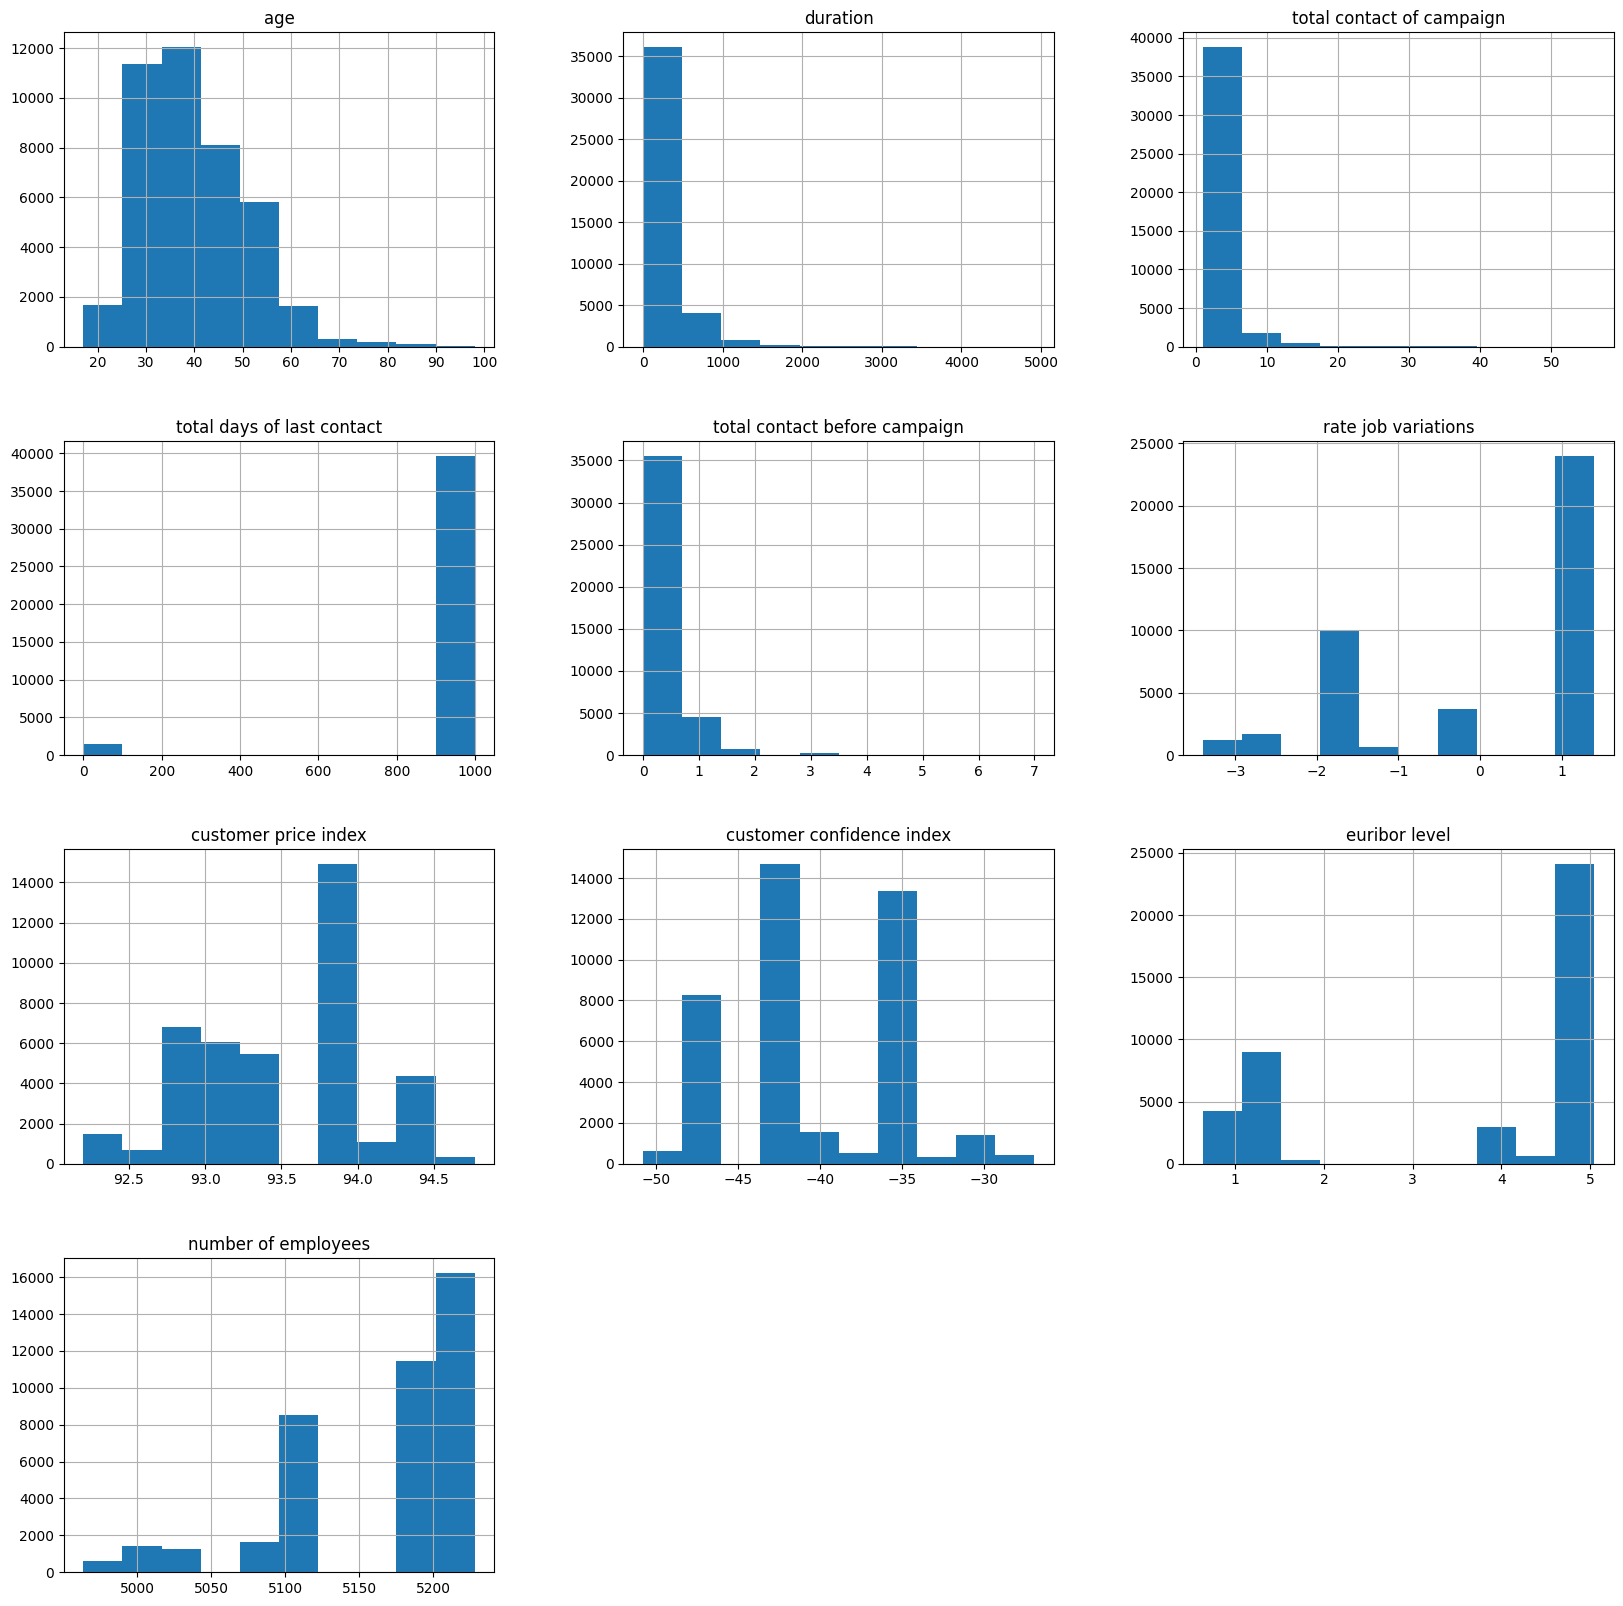

In [13]:
df_bank.hist(figsize=(20, 20))
plt.show()

- Memviasualisasikan berapa persen masing-masing jenis pekerjaan yang telah tercatat pada data

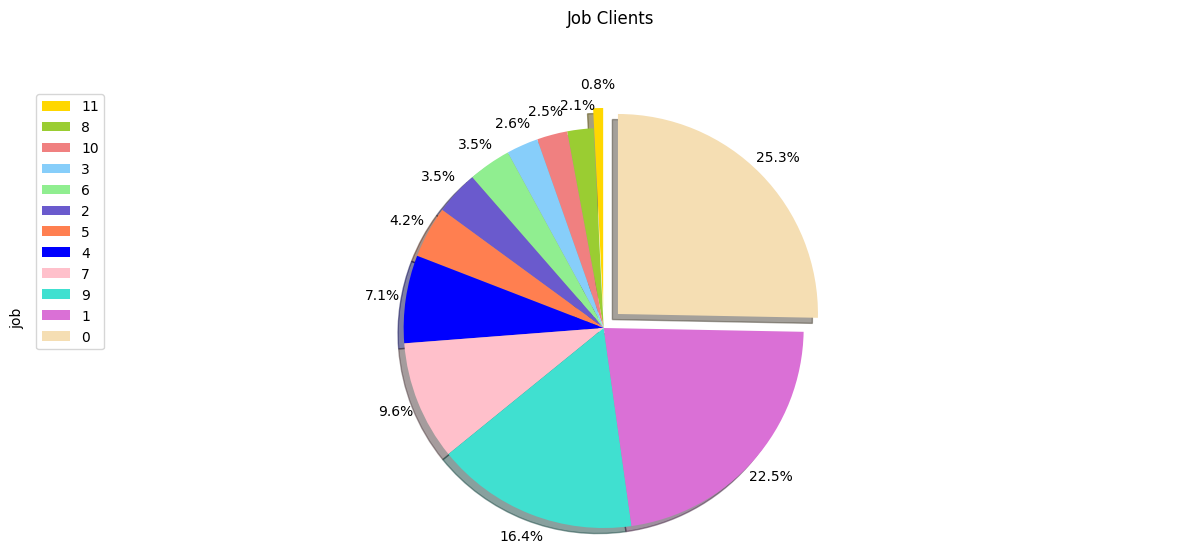

In [68]:
data1=df_bank['job'].value_counts().sort_values()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 
               'lightskyblue', 'lightgreen', 'slateblue', 'coral', 'blue', 
               'pink', 'turquoise', 'orchid', 'wheat']

explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]

data1.plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               labels=None,
               colors=colors_list,
               pctdistance=1.12,
               explode=explode_list)


plt.title('Job Clients', y=1.12)
plt.axis('equal')
plt.legend(labels=data1.index, loc='upper left')
plt.show()

### Label Encorder
Mengubah data menjadi numerik

In [14]:
label_encorder = preprocessing.LabelEncoder()
col_cat = ['job', 'marital', 'education', 'credit status', 'credit housing','loan',
            'contact','last contact of month','last contact of week',
            'result of campaign','deposit']


In [15]:
df_bank_new = df_bank.copy()
for column in col_cat:
    df_bank_new[column] = label_encorder.fit_transform(df_bank[column])

In [16]:
df_bank_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   job                            41176 non-null  int32  
 2   marital                        41176 non-null  int32  
 3   education                      41176 non-null  int32  
 4   credit status                  41176 non-null  int32  
 5   credit housing                 41176 non-null  int32  
 6   loan                           41176 non-null  int32  
 7   contact                        41176 non-null  int32  
 8   last contact of month          41176 non-null  int32  
 9   last contact of week           41176 non-null  int32  
 10  duration                       41176 non-null  int64  
 11  total contact of campaign      41176 non-null  int64  
 12  total days of last contact     41176 non-null 

In [17]:
le = preprocessing.LabelEncoder()

cat_vars = ['job', 'marital', 'education', 'credit status', 'credit housing','loan',
            'contact','last contact of month','last contact of week',
            'result of campaign','deposit']


for var in cat_vars:
    df_bank[var] = le.fit_transform(df_bank[var])

df_bank.head()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,...,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: >

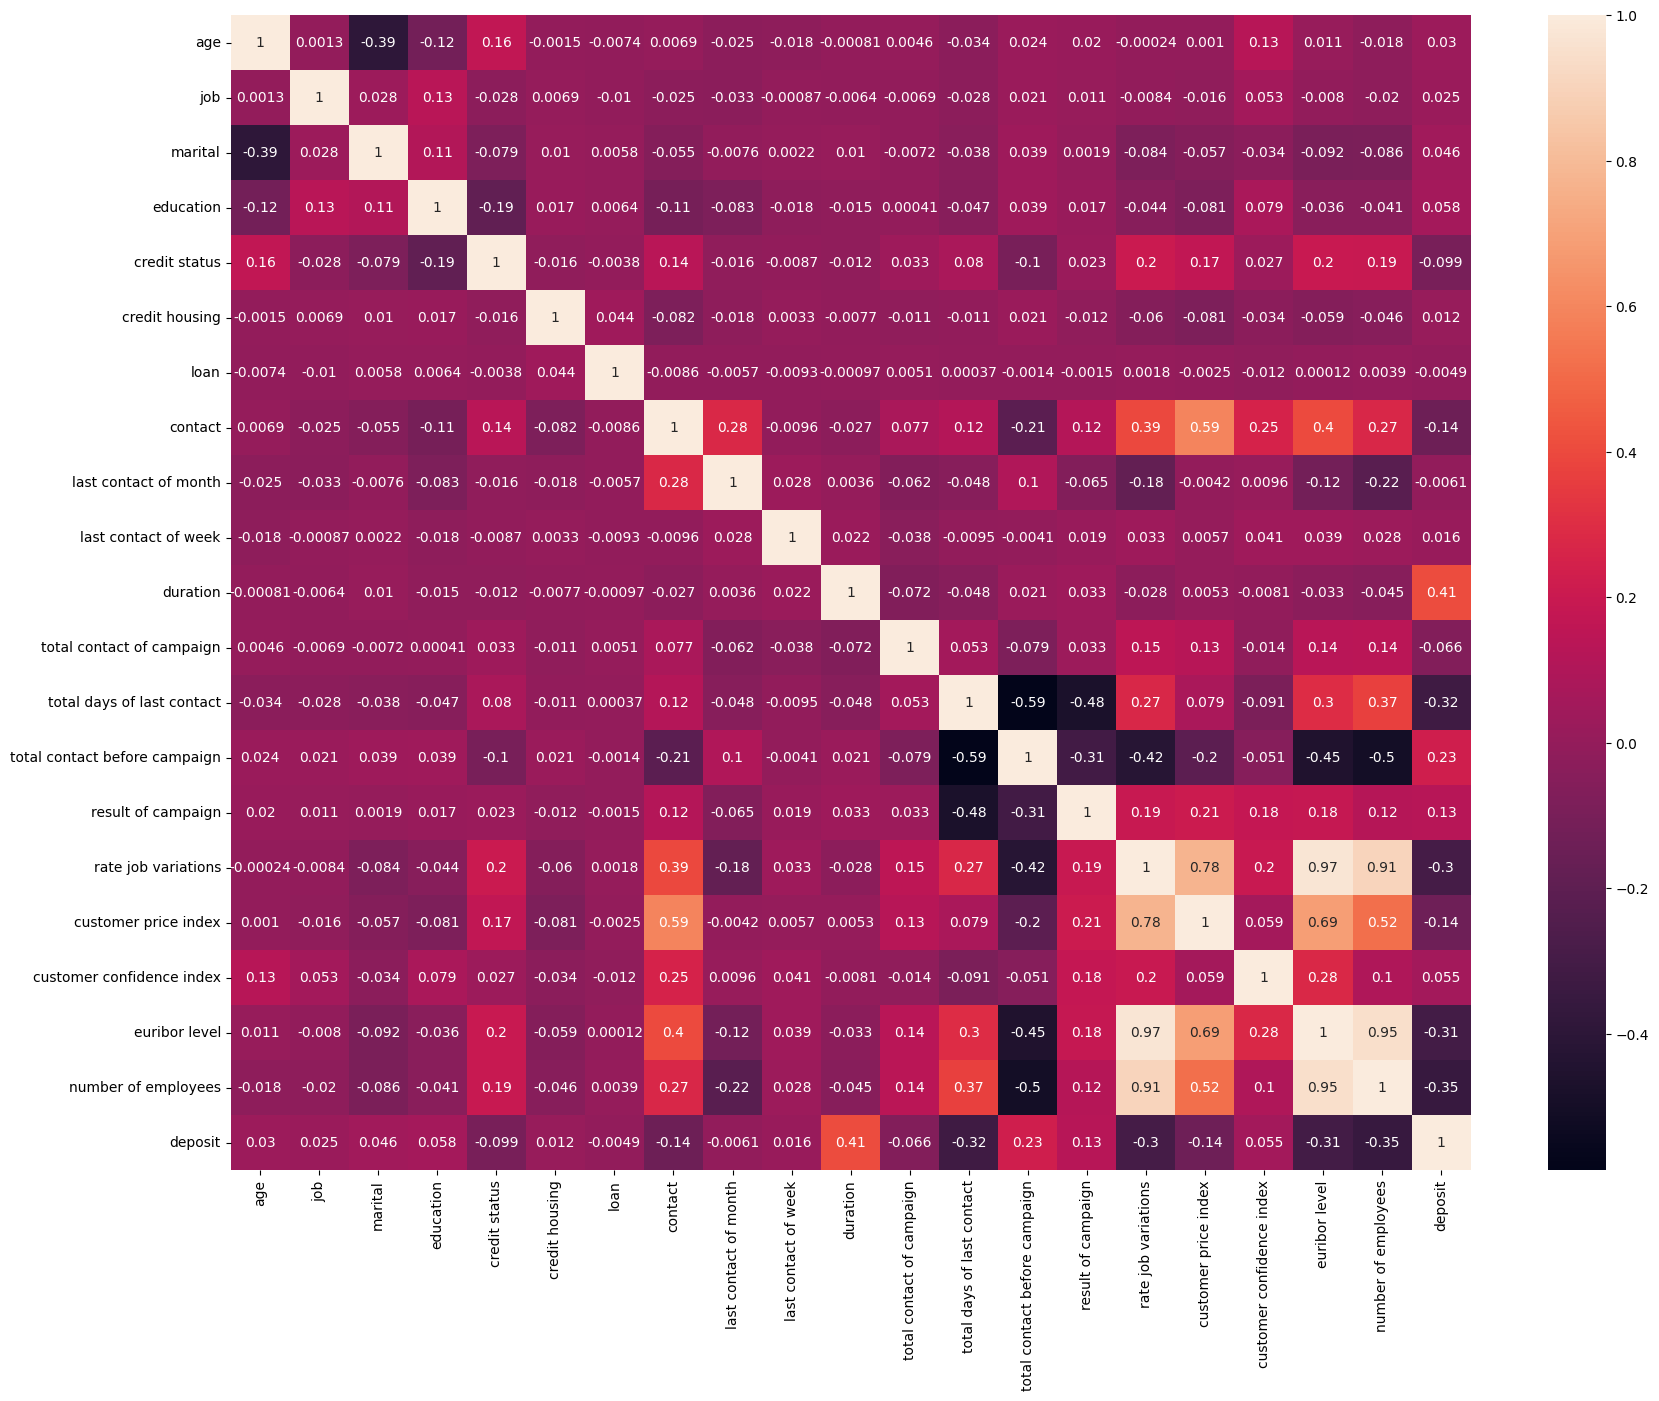

In [18]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_bank.corr(), annot=True)

### Scaler 
Menormalisasikan data dengan mensjadikan skala data numerik

In [19]:
X = df_bank.drop('deposit', axis=1)
y = df_bank['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1)

In [20]:
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Modelling

## Logistic Regresion

In [21]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

y_pred_logreg = logreg_model.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(report_logreg)
print(f"Accuracy of Logistic Regression on test set:{accuracy_logreg}")


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10967
           1       0.66      0.43      0.52      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.70      0.74     12353
weighted avg       0.90      0.91      0.90     12353

Accuracy of Logistic on test set: 0.9108718529911762 



Confusion Matrix : 
 [[10651   316]
 [  785   601]]


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

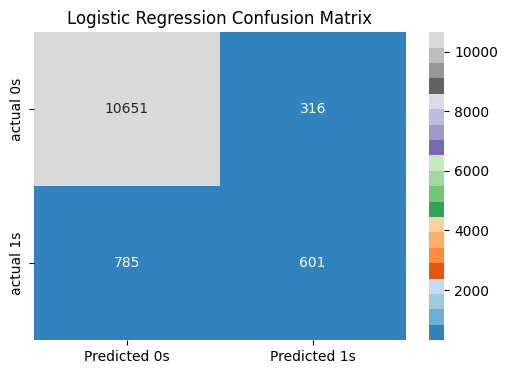

In [22]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Confusion Matrix :", "\n", cm_logreg)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logreg, annot=True, cmap='tab20c', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('actual 0s','actual 1s'))

**Hyperparameter Tuning using GridSeearchCV**

In [50]:
param_grid = {
    'penalty':['l1','l2'],
    'C' : [0.1, 1, 10],
    'solver' : ['saga']
}

grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters :", grid_search.best_params_)
print("Best Accuracy   :", grid_search.best_score_)

Best Parameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy   : 0.9096554262392467


In [24]:
best_estimator = grid_search.best_estimator_
y_pred2_logreg = best_estimator.predict(X_test_scaled)

acc2_logreg = accuracy_score(y_test, y_pred2_logreg)
print(f"Akurasi Model: {acc2_logreg}", "\n")

report = classification_report(y_test, y_pred2_logreg)
print(report)

Akurasi Model: 0.9108718529911762 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10967
           1       0.66      0.43      0.52      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.70      0.74     12353
weighted avg       0.90      0.91      0.90     12353



**Kesimpulan :** 

Berdasarkan hasil perhitungan akurasi pada model logistic tegression dapat disimpulkan bahwa, hyperparameter tuning menggunakan GridSearchCV tidak berpengaruh untuk menaikkan akurasi sehingga milai akurasi tetap pada angka 91,08%

## K-Nearest Neighbors (KNN)

In [73]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = knn.score(X_test, y_test)
report_knn = classification_report(y_test,y_pred_knn)

print(report_knn)
print(f'Accuracy of KNN classifier on test set:{accuracy_knn}')

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10967
           1       0.59      0.51      0.55      1386

    accuracy                           0.91     12353
   macro avg       0.77      0.73      0.75     12353
weighted avg       0.90      0.91      0.90     12353

Accuracy of KNN classifier on test set:0.9060147332631749


Confusion Matrix : 
 [[10487   480]
 [  681   705]]


<Axes: title={'center': 'KNN Confusion Matrix'}>

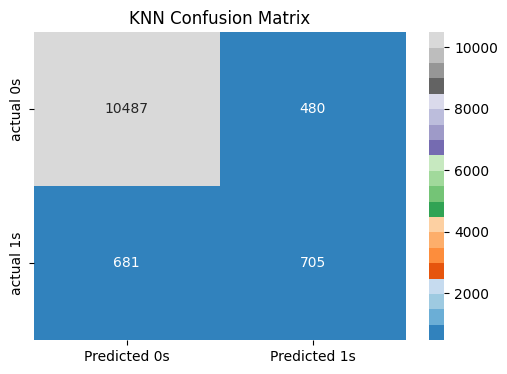

In [26]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix :", "\n", cm_knn)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("KNN Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap='tab20c', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('actual 0s','actual 1s'))

**Hyperparameter Tuning using GridSeearchCV**

In [27]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Best Parameters : {'n_neighbors': 11}
Best Score      : 0.9040002576027417


In [28]:
k = 11
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred2_knn = knn.predict(X_test_scaled)

acc2_knn = accuracy_score(y_test, y_pred2_knn)
print(f"Akurasi Model: {acc2_knn}", "\n")

report = classification_report(y_test, y_pred2_knn)
print(report)

Akurasi Model: 0.906257589249575 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10967
           1       0.64      0.37      0.47      1386

    accuracy                           0.91     12353
   macro avg       0.78      0.67      0.71     12353
weighted avg       0.89      0.91      0.89     12353



**Kesimpulan :** 

Berdasarkan hasil perhitungan akurasi pada model K-Nearest Neighbors dapat disimpulkan bahwa, hyperparameter tuning menggunakan GridSearchCV  berpengaruh untuk menaikkan akurasi tetapi tidak terlalu signifikan sehingga nilai akurasi bertambah dari 90,60% ke 90,62%.

## Support Vector Machine (SVM)

In [72]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_pred_svm)
report_svm = classification_report(y_test,y_pred_svm)

print(report_svm)
print(f"Accuracy of Support Vector Machine on test set:{accuracy_svm}")

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10967
           1       0.63      0.22      0.32      1386

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.88      0.90      0.88     12353

Accuracy of Support Vector Machine on test set:0.8978385817210395


Confusion Matrix : 
 [[10788   179]
 [ 1083   303]]


<Axes: title={'center': 'SVM Confusion Matrix'}>

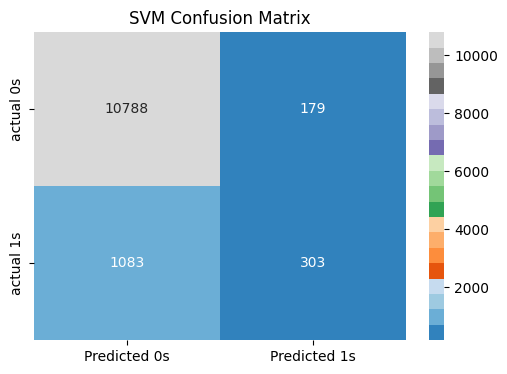

In [30]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Confusion Matrix :", "\n", cm_svm)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("SVM Confusion Matrix")
sns.heatmap(cm_svm, annot=True, cmap='tab20c', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('actual 0s','actual 1s'))

**Hyperparameter Tuning using GridSeearchCV**

In [31]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','radial']}  
   
grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 
   
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", lin

Best Parameters : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score      : 0.9013981328616234


In [32]:
y_pred2_svm = grid_search.predict(X_test_scaled)

acc2_svm = accuracy_score(y_test, y_pred2_svm)
print(f"Akurasi Model: {acc2_svm}", "\n")

report = classification_report(y_test, y_pred2_svm)
print(report)

Akurasi Model: 0.9025337974581074 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10967
           1       0.64      0.30      0.41      1386

    accuracy                           0.90     12353
   macro avg       0.78      0.64      0.68     12353
weighted avg       0.89      0.90      0.89     12353



**Kesimpulan :** 

Berdasarkan hasil perhitungan akurasi pada model Support Vector Machine dapat disimpulkan bahwa, hyperparameter tuning menggunakan GridSearchCV  berpengaruh untuk menaikkan akurasi sehingga nilai akurasi bertambah dari 89,78% ke 90,25%.

## Decision Tree

In [74]:
dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc_model.fit(X_train, y_train)

y_pred_dtc = dtc_model.predict(X_test)

accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
report_dtc = classification_report(y_test,y_pred_dtc)

print(report_dtc)
print(f"Accuracy of Decision Tree on test set:{accuracy_dtc}")

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10967
           1       0.55      0.70      0.61      1386

    accuracy                           0.90     12353
   macro avg       0.75      0.81      0.78     12353
weighted avg       0.91      0.90      0.91     12353

Accuracy of Decision Tree on test set:0.9007528535578402


Confusion Matrix : 
 [[10159   808]
 [  418   968]]


<Axes: title={'center': 'Decision Tree Confusion Matrix'}>

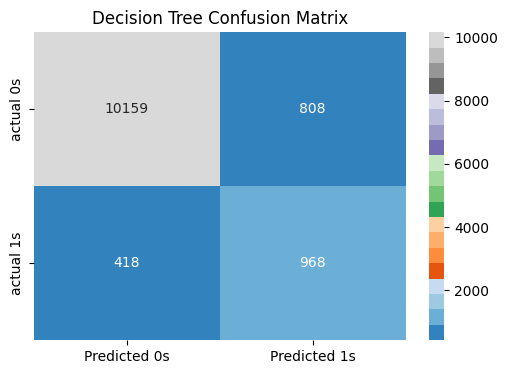

In [34]:
cm_dtc= confusion_matrix(y_test, y_pred_dtc)

print("Confusion Matrix :", "\n", cm_dtc)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap='tab20c', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('actual 0s','actual 1s'))

**Hyperparameter Tuning using GridSeearchCV**

In [35]:
param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(dtc_model, param_grid, cv=5, verbose=True)

# fitting the model for grid search 
grid_search.fit(X_train_scaled, y_train)
 
# print best parameter after tuning 
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters : {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}
Best Score      : 0.9044514957510594


In [36]:
y_pred4a = grid_search.predict(X_test_scaled)

acc2_dtc = accuracy_score(y_test, y_pred4a)
print(f"Akurasi Model: {acc2_dtc}", "\n")

report = classification_report(y_test, y_pred4a)
print(report)

Akurasi Model: 0.9053671172994414 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10967
           1       0.61      0.45      0.52      1386

    accuracy                           0.91     12353
   macro avg       0.77      0.71      0.73     12353
weighted avg       0.90      0.91      0.90     12353



**Kesimpulan :** 

erdasarkan hasil perhitungan akurasi pada model Decision Tree  dapat disimpulkan bahwa, hyperparameter tuning menggunakan GridSearchCV  mengalami penurunan akurasi sehingga didapatkan dilai akurasi yang awalnya 90,07% menjadi 90,53%

## Random Forest

In [75]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test,y_pred_rf)
report_rf = classification_report(y_test,y_pred_rf)

print(report_rf)
print(f"Accuracy of Random Forest on test set:{accuracy_rf}")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10967
           1       0.65      0.53      0.58      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.75      0.77     12353
weighted avg       0.91      0.91      0.91     12353

Accuracy of Random Forest on test set:0.9149194527645107


Confusion Matrix : 
 [[10788   179]
 [ 1083   303]]


<Axes: title={'center': 'Random Forest Confusion Matrix'}>

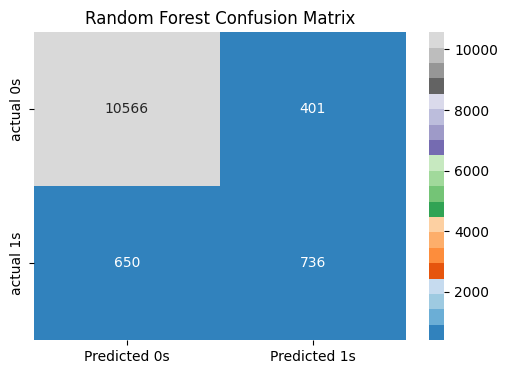

In [38]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix :", "\n", cm_svm)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap='tab20c', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('actual 0s','actual 1s'))

**Hyperparameter Tuning using GridSeearchCV**

In [39]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
   
# fitting the model for grid search 
grid_search.fit(X_train_scaled, y_train)
 
# print best parameter after tuning 
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Best Parameters : {'n_estimators': 250}
Best Score      : 0.9159698893692525


In [40]:
y_pred2_rf = grid_search.predict(X_test_scaled)

acc2_rf = accuracy_score(y_test, y_pred2_rf)

print(f"Akurasi Model: {acc2_rf}", "\n")

report = classification_report(y_test, y_pred2_rf)
print(report)

Akurasi Model: 0.9159718287055776 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10967
           1       0.65      0.54      0.59      1386

    accuracy                           0.92     12353
   macro avg       0.80      0.75      0.77     12353
weighted avg       0.91      0.92      0.91     12353



**Kesimpulan :** 

Berdasarkan hasil perhitungan akurasi pada model K-Nearest Neighbors dapat disimpulkan bahwa, hyperparameter tuning menggunakan GridSearchCV  berpengaruh untuk menaikkan akurasi tetapi tidak terlalu signifikan sehingga nilai akurasi bertambah dari 91,49% ke 91,59%.

## Naive Bayes

In [76]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test,y_pred_nb)
report_nb = classification_report(y_test,y_pred_nb)

print(report_nb)
print(f"Accuracy of Naive Bayes on test set:{accuracy_nb}")

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10967
           1       0.38      0.60      0.46      1386

    accuracy                           0.85     12353
   macro avg       0.66      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353

Accuracy of Naive Bayes on test set:0.8452197846676921


Confusion Matrix : 
 [[9612 1355]
 [ 557  829]]


<Axes: title={'center': 'Naive Bayes Confusion Matrix'}>

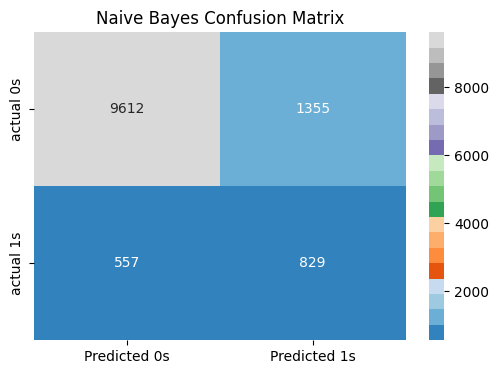

In [42]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("Confusion Matrix :", "\n", cm_nb)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb, annot=True, cmap='tab20c', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'),
            yticklabels = ('actual 0s','actual 1s'))

In [43]:
n_features, n_classes = X_train_scaled.shape[1], np.unique(y_train)
n_features, n_classes

(20, array([0, 1]))

In [49]:
params = {
            'priors': [None],
            'var_smoothing': [1e-9, 1e-6, 1e-12],
         }


grid_search = GridSearchCV(nb_model, params, n_jobs=-1, cv=5, verbose=5)
   
grid_search.fit(X_train_scaled, y_train)
 
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters : {'priors': None, 'var_smoothing': 1e-09}
Best Score      : 0.8465808291798904


In [48]:
y_pred2_nb = grid_search.predict(X_test_scaled)

acc2_nb = accuracy_score(y_test, y_pred2_nb)

print(f"Akurasi Model: {acc2_nb}", "\n")

report = classification_report(y_test, y_pred2_nb)
print(report)

Akurasi Model: 0.8451388326722253 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10967
           1       0.38      0.60      0.46      1386

    accuracy                           0.85     12353
   macro avg       0.66      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353



**Kesimpulan :** 

erdasarkan hasil perhitungan akurasi pada model Decision Tree  dapat disimpulkan bahwa, hyperparameter tuning menggunakan GridSearchCV  mengalami penurunan akurasi sehingga didapatkan dilai akurasi yang awalnya 84,52% menjadi 85,51%

# Conclusion

In [70]:
print('Berikut merupakan hasil akurasi setelah menggunakan Model Improvement menggunakan GridSearchCV')
print(f'Accuracy of Logistic Regression on test set:{acc2_logreg}')
print(f'Accuracy of K-Nearest Neighbors on test set:{acc2_knn}')
print(f'Accuracy of Support Vector Machine on test set:{acc2_svm}')
print(f'Accuracy of Decision Tree on test set:{acc2_dtc}')
print(f'Accuracy of Random Forest on test set:{acc2_rf}')
print(f'Accuracy of Naive Bayesc on test set:{acc2_nb}')

Berikut merupakan hasil akurasi setelah menggunakan Model Improvement menggunakan GridSearchCV
Accuracy of Logistic Regression on test set:0.9108718529911762
Accuracy of K-Nearest Neighbors on test set:0.906257589249575
Accuracy of Support Vector Machine on test set:0.9025337974581074
Accuracy of Decision Tree on test set:0.9053671172994414
Accuracy of Random Forest on test set:0.9159718287055776
Accuracy of Naive Bayesc on test set:0.8451388326722253


Berdasarkan dengan pemodelan data yang telah dilakukan, mak dapat disimpulkan bahwa : 

- Model terbaik yang didapatkan berdasarkan nilai akurasi tertinggi yaitu Random Forest dengan akurasi 91,49% dan saat model improvement dengan GridSearchCV nilai akurasi naik menjadi 91,59%
- Model dengan akurasi terkecil yaitu Naive Bayes dengan akurasi 84,52% dan mengalami sedikit penurunan dengan nilai 84,51% saat dilakukan model improvement menggunakan GridSearchCV
- Hyperparameter Tuning Menggunakan GridSearch CV dapat berpengaruh untuk krnaikan akurasi model, tetapi tidak semua model dapat mengalami kenaikan akurasi bisa saja nilai akurasinya tetap seperti pada model Logistic Regression atau bisa juga  mengalami penurunan seperti pada model Decision Tree
